# Tensorflow Tutorial

## Basics

In [2]:
import tensorflow as tf

print(tf.__version__)

#simple nodes constants
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

sess = tf.Session()
print(sess.run([node1, node2]))

node3 = tf.add(node1, node2)
print ("node 3", node3)
print ("ses.run(node3) ", sess.run(node3))



1.1.0
Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)
[3.0, 4.0]
node 3 Tensor("Add:0", shape=(), dtype=float32)
ses.run(node3)  7.0


### Placeholders

In [10]:
#placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b 

print(sess.run(adder_node, {a:3, b:4.5}))
print(sess.run(adder_node, {a:[1,2], b:[2,4]}))

add_and_triple = adder_node  * 3
print (sess.run(add_and_triple, {a:3, b:2}))


7.5
[ 3.  6.]
15.0


### Variables

In [11]:
#Variables

W = tf.Variable([0.3], tf.float32)
b = tf.Variable([-0.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

init = tf.global_variables_initializer()
sess.run(init)  # to intitalize the variables
print(sess.run(linear_model, {x:[1,2,3,4]}))



[ 0.          0.30000001  0.60000002  0.90000004]


### Loss Function With Manual Assing of W and b

In [12]:
#loss functin mean square error
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

# manuall assign W and b i.e overwrite thier intial values
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])

# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

sess.run([fixW, fixb])

23.66


[array([-1.], dtype=float32), array([ 1.], dtype=float32)]

### Gradient Decent To Learn W and b

In [13]:

print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))

#instead use gradient decent
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

sess.run(init) # reset values to incorrect defaults.
for i in range(1000):
  sess.run(train, {x:x_train, y:y_train})

curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

0.0
W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


### Getting value of tensor

In [7]:
W = tf.Variable(tf.truncated_normal([700, 10]))
with tf.Session() as sess:
    sess.run(W.initializer)
    print (W.eval())

[[-1.24333394 -0.1900686  -0.1644651  ..., -1.33590472  0.42622656
  -0.52313727]
 [-1.37378037  0.35021719 -0.16187337 ...,  1.17692494 -1.23567784
   0.03943379]
 [ 0.0998599   1.51386094  0.26472214 ..., -0.49311253  0.36364356
  -1.01890135]
 ..., 
 [ 0.41101906  1.30396247  0.70703191 ...,  0.61746824  0.80136269
   0.71650136]
 [-0.46992993 -0.46608508  0.06637532 ..., -0.76059228  1.47038555
   0.13357587]
 [ 1.48554099  0.37901375 -0.66855121 ...,  0.58413416  0.45283294
  -0.37232795]]


### Assign Op

In [11]:
W = tf.Variable(10)
assign_op = W.assign(100)
with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(assign_op)
    print (W.eval())

100


### Multiple Sessions 

In [15]:
# Each session contains its own instance
W = tf.Variable(10)
sess1 = tf.Session()
sess2 = tf.Session()
sess1.run(W.initializer)
sess2.run(W.initializer)
print (sess1.run(W.assign_add(10))) # >> 20
print (sess2.run(W.assign_sub(2))) # >> 8
print (sess1.run(W.assign_add(100))) # >> 120
print (sess2.run(W.assign_sub(50))) # >> -42
sess1.close()
sess2.close()

20
8
120
-42


### Interactive Session

In [18]:
#the default session ,no need to specify the session object, good for ipython
sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
# We can just use 'c.eval()' without passing 'sess'
print(c.eval())
sess.close()

30.0


### Placeholders 

In [23]:
# create a placeholder of type float 32-bit, shape is a vector of 3 elements
a = tf.placeholder(tf.float32, shape=[3])
# create a constant of type float 32-bit, shape is a vector of 3 elements
b = tf.constant([5, 5, 5], tf.float32)
# use the placeholder as you would a constant or a variable
c = a + b # Short for tf.add(a, b)
with tf.Session() as sess:
    print(sess.run(c, {a: [1, 2, 3]}))
    writer = tf.summary.FileWriter('./my_graph', sess.graph)

[ 6.  7.  8.]


In [29]:
# other variables are also feedable besides placeholder
# create Operations, Tensors, etc (using the default graph)
a = tf.add(2, 5)
b = tf.multiply(a, 3)
# start up a `Session` using the default graph
sess = tf.Session()
# define a dictionary that says to replace the value of `a` with 15
replace_dict = {a: 15}
# Run the session, passing in `replace_dict` as the value to `feed_dict`

sess.run(b, feed_dict=replace_dict) # returns 45

45

### Lazy Loading 

In [31]:
x = tf.Variable(10, name='x')
y = tf.Variable(20, name='y')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(10):
        print (sess.run(tf.add(x, y)) )  #calling add operation at run time instead of predefined graph

30
30
30
30
30
30
30
30
30
30


## Using tf.contrib.learn

In [6]:
import tensorflow as tf
# NumPy is often used to load, manipulate and preprocess data.
import numpy as np

# Declare list of features. We only have one real-valued feature. There are many
# other types of columns that are more complicated and useful.
features = [tf.contrib.layers.real_valued_column("x", dimension=1)]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# logistic regression, linear classification, logistic classification, and
# many neural network classifiers and regressors. The following code
# provides an estimator that does linear regression.
estimator = tf.contrib.learn.LinearRegressor(feature_columns=features)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use `numpy_input_fn`. We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x = np.array([1., 2., 3., 4.])
y = np.array([0., -1., -2., -3.])
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":x}, y, batch_size=4,
                                              num_epochs=1000)

# We can invoke 1000 training steps by invoking the `fit` method and passing the
# training data set.
estimator.fit(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did. In a real example, we would want
# to use a separate validation and testing data set to avoid overfitting.
print(estimator.evaluate(input_fn=input_fn))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11ea65a58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving

## Mnist Softmax

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import argparse
import sys


FLAGS = None

def main1(_):
    # Import data
    mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.matmul(x, W) + b

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 10])

    # The raw formulation of cross-entropy,
    #
    #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
    #                                 reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
    # outputs of 'y', and then average across the batch.

    cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    # Train
    for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: mnist.test.labels}))
    

    
parser = argparse.ArgumentParser()
parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                  help='Directory for storing input data')
FLAGS, unparsed = parser.parse_known_args("")

tf.app.run(main=main1)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
0.9191


SystemExit: 

/Users/nahmad/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Mnist Convolution 

In [8]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 128
display_step = 10

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)


# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    while step * batch_size < training_iters:
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
        if step % display_step == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                  "{:.6f}".format(loss) + ", Training Accuracy= " + \
                  "{:.5f}".format(acc))
        step += 1
    print("Optimization Finished!")

    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256],
                                      keep_prob: 1.}))

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Iter 1280, Minibatch Loss= 22469.199219, Training Accuracy= 0.28125
Iter 2560, Minibatch Loss= 9688.896484, Training Accuracy= 0.57812
Iter 3840, Minibatch Loss= 4534.458008, Training Accuracy= 0.73438
Iter 5120, Minibatch Loss= 5309.243164, Training Accuracy= 0.70312
Iter 6400, Minibatch Loss= 4053.856934, Training Accuracy= 0.78125
Iter 7680, Minibatch Loss= 3017.647949, Training Accuracy= 0.81250
Iter 8960, Minibatch Loss= 2473.896484, Training Accuracy= 0.85938
Iter 10240, Minibatch Loss= 2305.780518, Training Accuracy= 0.85156
Iter 11520, Min

Iter 148480, Minibatch Loss= 460.820465, Training Accuracy= 0.95312
Iter 149760, Minibatch Loss= 232.128677, Training Accuracy= 0.95312
Iter 151040, Minibatch Loss= 168.828171, Training Accuracy= 0.96094
Iter 152320, Minibatch Loss= 140.128754, Training Accuracy= 0.97656
Iter 153600, Minibatch Loss= 123.327728, Training Accuracy= 0.97656
Iter 154880, Minibatch Loss= 105.397865, Training Accuracy= 0.96875
Iter 156160, Minibatch Loss= 66.807327, Training Accuracy= 0.97656
Iter 157440, Minibatch Loss= 376.131714, Training Accuracy= 0.95312
Iter 158720, Minibatch Loss= 413.877930, Training Accuracy= 0.97656
Iter 160000, Minibatch Loss= 177.611984, Training Accuracy= 0.96094
Iter 161280, Minibatch Loss= 18.608948, Training Accuracy= 0.99219
Iter 162560, Minibatch Loss= 337.329376, Training Accuracy= 0.95312
Iter 163840, Minibatch Loss= 204.077530, Training Accuracy= 0.96875
Iter 165120, Minibatch Loss= 237.645569, Training Accuracy= 0.96875
Iter 166400, Minibatch Loss= 358.565430, Training 

### TensorBoard Example

In [4]:
import tensorflow as tf
a = tf.constant([2, 2], name="a")
b = tf.constant([3, 6], name="b")
x = tf.add(a, b, name="add")
x = tf.add(a,b)

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print (sess.run(x))

# close the writer when you’re done using it
writer.close()

[5 8]


### TFRecord

In [2]:
#example from https://github.com/chiphuyen/tf-stanford-tutorials/blob/master/examples/09_tfrecord_example.py
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import sys
sys.path.append('..')

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# image supposed to have shape: 480 x 640 x 3 = 921600
IMAGE_PATH = 'data/'

def _int64_feature(value):
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def get_image_binary(filename):
    """ You can read in the image using tensorflow too, but it's a drag
        since you have to create graphs. It's much easier using Pillow and NumPy
    """
    image = Image.open(filename)
    image = np.asarray(image, np.uint8)
    shape = np.array(image.shape, np.int32)
    return shape.tobytes(), image.tobytes() # convert image to raw data bytes in the array.

def write_to_tfrecord(label, shape, binary_image, tfrecord_file):
    """ This example is to write a sample to TFRecord file. If you want to write
    more samples, just use a loop.
    """
    writer = tf.python_io.TFRecordWriter(tfrecord_file)
    # write label, shape, and image content to the TFRecord file
    example = tf.train.Example(features=tf.train.Features(feature={
                'label': _int64_feature(label),
                'shape': _bytes_feature(shape),
                'image': _bytes_feature(binary_image)
                }))
    writer.write(example.SerializeToString())
    writer.close()

def write_tfrecord(label, image_file, tfrecord_file):
    shape, binary_image = get_image_binary(image_file)
    write_to_tfrecord(label, shape, binary_image, tfrecord_file)

In [3]:
# write tfrecord
label = 1 
image_file = IMAGE_PATH + 'friday.jpg'
tfrecord_file = IMAGE_PATH + 'friday.tfrecord'
write_tfrecord(label, image_file, tfrecord_file)


In [4]:
def read_from_tfrecord(filenames):
    tfrecord_file_queue = tf.train.string_input_producer(filenames, name='queue')
    reader = tf.TFRecordReader()
    _, tfrecord_serialized = reader.read(tfrecord_file_queue)

    # label and image are stored as bytes but could be stored as 
    # int64 or float64 values in a serialized tf.Example protobuf.
    tfrecord_features = tf.parse_single_example(tfrecord_serialized,
                        features={
                            'label': tf.FixedLenFeature([], tf.int64),
                            'shape': tf.FixedLenFeature([], tf.string),
                            'image': tf.FixedLenFeature([], tf.string),
                        }, name='features')
    # image was saved as uint8, so we have to decode as uint8.
    image = tf.decode_raw(tfrecord_features['image'], tf.uint8)
    shape = tf.decode_raw(tfrecord_features['shape'], tf.int32)
    # the image tensor is flattened out, so we have to reconstruct the shape
    image = tf.reshape(image, shape)
    label = tfrecord_features['label']
    return label, shape, image

def read_tfrecord(tfrecord_file):
    label, shape, image = read_from_tfrecord([tfrecord_file])

    with tf.Session() as sess:
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        label, image, shape = sess.run([label, image, shape])
        coord.request_stop()
        coord.join(threads)
    print(label)
    print(shape)
    plt.imshow(image)
    plt.show()

1
[322 403   3]


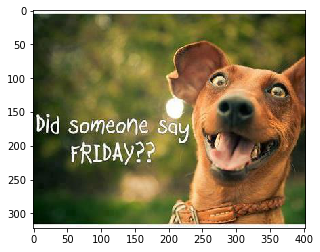

In [6]:
read_tfrecord(tfrecord_file)

### Queues and Threads

In [11]:
#Example from https://github.com/chiphuyen/tf-stanford-tutorials/blob/master/examples/09_queue_example.py
N_SAMPLES = 1000
NUM_THREADS = 4

data = 10 * np.random.randn(N_SAMPLES, 4) + 1 
print (data.shape)
print (data[0])
# create 1000 random labels of 0 and 1
target = np.random.randint(0, 2, size=N_SAMPLES) 
print (target.shape)
print (target[0])

(1000, 4)
[ -3.75682045  -7.62788714   3.57928583  10.92023184]
(1000,)
0


In [13]:
queue = tf.FIFOQueue(capacity=50, dtypes=[tf.float32, tf.int32], shapes=[[4], []])
enqueue_op = queue.enqueue_many([data, target])
data_sample, label_sample = queue.dequeue()

# create NUM_THREADS to do enqueue
qr = tf.train.QueueRunner(queue, [enqueue_op] * NUM_THREADS)
with tf.Session() as sess:
    coord = tf.train.Coordinator()
    enqueue_threads = qr.create_threads(sess, coord=coord, start=True)
    try:
        for step in range(10): # do to 10 iterations
            if coord.should_stop():
                break
            data_batch, label_batch = sess.run([data_sample, label_sample])
            print(data_batch)
            print(label_batch)
    except Exception as e:
        coord.request_stop(e)
    finally:
        coord.request_stop()
        coord.join(enqueue_threads)

[ -3.75682044  -7.62788725   3.57928586  10.92023182]
0
[  8.4301815   12.91631889  15.12774849 -14.6158886 ]
1
[ 18.95965195   0.36353713  -1.44373024   8.22130871]
1
[ 4.93827343 -5.67915154  9.8135643  -9.98721409]
0
[  5.95766449 -22.47851372 -17.61420441  23.70749664]
0
[  3.32130861  15.91544819  -6.17239475  18.65179825]
0
[  2.78415728 -10.74323273   4.15628719  -6.42623234]
1
[ -5.78512955  22.21388245  24.88416862   3.04967952]
1
[-20.11832619   5.11196566  18.0784626    3.68860054]
0
[  2.23611975  -4.77511215  -5.27372837  14.63363361]
1


### Checkpoint

In [54]:
!mkdir -p checkpoint

In [3]:
#run the model and store checkpoints every 100 iteration

W = tf.Variable([0.3], tf.float32)
b = tf.Variable([-0.3], tf.float32)
x = tf.placeholder(tf.float32, name="x")
linear_model = W * x + b


#loss functin mean square error
y = tf.placeholder(tf.float32, name ="y")
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

# training data
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

#instead use gradient decent
global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss, global_step=global_step)
init = tf.global_variables_initializer()

# create a saver object
saver = tf.train.Saver(max_to_keep=10)


with tf.Session() as sess:
    sess.run(init) # reset values to incorrect defaults.
    print(sess.run(loss, {x:x_train, y:y_train}))
    
    for i in range(1000):
        sess.run(train, {x:x_train, y:y_train})
        
        if (i + 1) % 100==0:
            saver.save(sess, 'checkpoint/linear_model', global_step=global_step)

    curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))


23.66
W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


In [61]:

with tf.Session() as sess:
    #now restore a checkpoint say at 600the iteration
    saver.restore(sess, 'checkpoint/linear_model-100')
    curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
    
with tf.Session() as sess:
    #now restore a checkpoint say at 600the iteration
    saver.restore(sess, 'checkpoint/linear_model-700')
    curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

INFO:tensorflow:Restoring parameters from checkpoint/linear_model-100
W: [-0.84079814] b: [ 0.53192717] loss: 0.146364
INFO:tensorflow:Restoring parameters from checkpoint/linear_model-700
W: [-0.99988455] b: [ 0.99966055] loss: 7.69487e-08


In [62]:
#load the latest checkpoint

with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state(os.path.dirname('checkpoint/'))
    if ckpt and ckpt.model_checkpoint_path:
        print(ckpt.model_checkpoint_path)
        saver.restore(sess, ckpt.model_checkpoint_path)
        curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
        print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
    

checkpoint/linear_model-1000
INFO:tensorflow:Restoring parameters from checkpoint/linear_model-1000
W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


### Summaries

In [5]:
loss_summary = tf.summary.scalar("loss", loss)
hist_summary = tf.summary.histogram("histogram_loss", loss)
summ_op = tf.summary.merge([loss_summary,hist_summary])
 
print (summ_op)

with tf.Session() as sess:
    sess.run(init) # reset values to incorrect defaults.
    
    print(sess.run(loss, {x:x_train, y:y_train}))
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    for i in range(1000):
        _,_,summary = sess.run([loss,train,summ_op], feed_dict={x:x_train, y:y_train})
        writer.add_summary(summary, global_step=i)
        
    curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
    print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
    # close the writer when you’re done using it
    writer.close()

Tensor("Merge_1/MergeSummary:0", shape=(), dtype=string)
23.66
W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


tensorboard --logdir ./graphs/